In [1]:
!pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.2/689.2 kB 11.0 MB/s eta 0:00:00a 0:00:01


In [2]:
!pip install hrv-analysis
!pip install pyhrv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 kB 4.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 44.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 2.9 MB/s eta 0:00:00
  Created wheel for spectrum: filename=spectrum-0.8.1-cp310-cp310-linux_x86_64.whl size=227335 sha256=e6552c01eb9d4a62bf5463fe5b7794975b806fd419f5019c702a7fd7b5bea936
  Stored in directory: /root/.cache/pip/wheels/e7/5a/09/ffc6afdf8a5a6f58e9851292108df32bb11374e11b8705cabd
Successfully built spectrum
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 3.11.0
    Uninstalling platformdirs-3.11.0:
      Successfully uninstalled platformdirs-3.11.0
  Attempting uninstall: pexpect
    Found existing installation: 

In [3]:
import pandas as pd
import numpy as np

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [4]:
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import wfdb
import os
import ast
import neurokit2 as nk
import matplotlib
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

2024-06-16 21:58:16.485877: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 21:58:16.486019: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 21:58:16.644434: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
import warnings
from scipy.interpolate import interp1d
from scipy import signal
from scipy.integrate import trapz
import pyhrv.tools as tools
import pyhrv.frequency_domain as fd

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [6]:
ecg_data_arrhytmia = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/df_arrhytmia.csv", index_col=0)
ecg_data_ptb_xl = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/df_ptb_xl.csv", index_col=0)

for i in ecg_data_ptb_xl.index:
    if ecg_data_ptb_xl.electrodes_problems[i] in ecg_data_ptb_xl.electrodes_problems.value_counts().index:
        ecg_data_ptb_xl = ecg_data_ptb_xl.drop(labels = [i],axis = 0)
ecg_data_ptb_xl =ecg_data_ptb_xl[(ecg_data_ptb_xl.diagnostic != "") & (ecg_data_ptb_xl.rhythm != "")]

In [7]:
ecg_data_ptb_xl.electrodes_problems.value_counts()

Series([], Name: count, dtype: int64)

In [8]:
def load_signals(df, path):
    data = [wfdb.rdsamp(os.path.join(path, link)) for link in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [9]:
#ecg_signal = load_signals(ecg_data_ptb_xl, '/kaggle/input/ptb-xl-a-large-publicly-available2/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/')

In [10]:
class ECG_RR():
    def __init__(self,info,ecg_signals_1,name):
        self.ECG = info
        self.ecg_signals_1 = ecg_signals_1
        self.name = name
    def RR(self,sp,RR_d):
        RR_d = RR_d
        if len(self.ECG[self.name]) > 3:
            for i in range(0,len(self.ECG[self.name])-1):
                RR_d = sp(RR_d,list(self.ECG[self.name])[i+1] - list(self.ECG[self.name])[i])
        else :RR_d =0
        return RR_d
    def R_m(self,sp):
        if len(self.ecg_signals_1[self.ecg_signals_1[self.name]>0].ECG_Raw):
            return sp(self.ecg_signals_1[self.ecg_signals_1[self.name]>0].ECG_Raw)
        else: return 0
    #def Razn(self):
    #    Onsets = pd.DataFrame(self.ECG[self.name[:-5]+"Onsets"])
    #    Offsets = pd.DataFrame(self.ECG[self.name[:-5]+"Offsets"])
    #    id_index = self.ecg_signals_1[self.ecg_signals_1["ECG_R_Peaks"]>0].index
    #    if len(Onsets) > 0 and len(Offsets) > 0:
    #        for i in Onsets.index:
    #            if str(pd.DataFrame(Onsets[i]) == "nan"
    #            if Onsets[i] - Onsets[i] > 0 
                
                
        

In [11]:
def timedomain_pic(ecg_signals_1,info,name,results):
    ECG = ECG_RR(info,ecg_signals_1,"ECG_R_Peaks")
    name = str(name)+"_"
    results[name+'Max_R'] = [ECG.R_m(max)]
    results[name+'Min_R'] = [ECG.R_m(min)]
    results[name+'Max_RR'] = [ECG.RR(max,0)*(1/500)]
    results[name+'Min_RR'] = [ECG.RR(min,500)*(1/500)]
    ECG = ECG_RR(info,ecg_signals_1,"ECG_P_Peaks")
    results[name+'Max_P'] = [ECG.R_m(max)]
    results[name+'Min_P'] = [ECG.R_m(min)]
    ECG = ECG_RR(info,ecg_signals_1,"ECG_Q_Peaks")
    results[name+'Max_Q'] = [ECG.R_m(max)]
    results[name+'Min_Q'] = [ECG.R_m(min)]
    ECG = ECG_RR(info,ecg_signals_1,"ECG_S_Peaks")
    results[name+'Max_S'] = [ECG.R_m(max)]
    results[name+'Min_S'] = [ECG.R_m(min)]
    ECG = ECG_RR(info,ecg_signals_1,"ECG_T_Peaks")
    results[name+'Max_T'] = [ECG.R_m(max)]
    results[name+'Min_T'] = [ECG.R_m(min)]
    return results

In [12]:
def timedomain_HRV(ecg_signals_1,info,name,results):
    try:
        rr_intervals_list = info['ECG_R_Peaks']
        nni_2 = tools.nn_intervals(rr_intervals_list)
        result = fd.welch_psd(nni=nni_2,show=False, show_param=False,legend=False)
        matplotlib.pyplot.close(fig="all")
    except:
        return results
    name = str(name)+"_"
    results[name+'VLF_Peak (Hz)'] = [result[1][0]]
    results[name+'LF_Peak (Hz)'] = [result[1][1]]
    results[name+'HV_Peak (Hz)'] = [result[1][2]]
    results[name+'VLF_Abs (ms2)'] = [result[2][0]]
    results[name+'LF_Abs (ms2)'] = [result[2][1]]
    results[name+'HV_Abs (ms2)'] = [result[2][2]]
    results[name+'VLF_Rel (%)'] = [result[3][0]]
    results[name+'LF_Rel (%)'] = [result[3][1]]
    results[name+'HV_Rel (%)'] = [result[3][2]]
    results[name+'VLF_Log (-)'] = [result[4][0]]
    results[name+'LF_Log (-)'] = [result[4][1]]
    results[name+'HV_Log (-)'] = [result[4][2]]
    results[name+'LF_Norm (-)'] = [result[5][0]]
    results[name+'HV_Norm (-)'] = [result[5][1]]
    results[name+'LF/HF (-)'] = [result[6]]
    results[name+'Total Power (ms)'] = [result[7]]
    return results

In [13]:
def timedomain(ecg_signals_1,info,name,results):
    rr = info['ECG_R_Peaks'][:-1]
    name = str(name)+"_"
    rr_ecg = np.diff(rr)
    rr = rr_ecg*10
    hr = 60000/rr
    results[name+'Mean RR (ms)'] = [np.mean(rr)]
    results[name+'STD RR/SDNN (ms)'] = [np.std(rr)]
    results[name+'Mean HR (Kubios\' style) (beats/min)'] = [60000/np.mean(rr)]
    results[name+'Mean HR (beats/min)'] = [np.mean(hr)]
    results[name+'STD HR (beats/min)'] = [np.std(hr)]
    results[name+'Min HR (beats/min)'] = [np.min(hr)]
    results[name+'Max HR (beats/min)'] = [np.max(hr)]
    results[name+'RMSSD (ms)'] = [np.sqrt(np.mean(np.square(np.diff(rr))))]
    results[name+'NNxx'] = [np.sum(np.abs(np.diff(rr)) > 50)*1]
    results[name+'pNNxx (%)'] = [100 * np.sum((np.abs(np.diff(rr)) > 50)*1) / len(rr)]
    return results

In [14]:
def ecg_HRV_df(ecg_signals_1,info,name):
    results = {}
    results = pd.DataFrame(results)
    results =timedomain(ecg_signals_1,info,name,results)
    results =timedomain_HRV(ecg_signals_1,info,name,results)
    results =timedomain_pic(ecg_signals_1,info,name,results)
    return results

In [15]:
def ecg_HRV_0(ecg_signal):
    df_HTV =pd.DataFrame()
    df = pd.DataFrame(ecg_signal)
    for j in range(0,12):
        ecg_signals_1, info  = nk.ecg_process(df[j], sampling_rate=500)
        HTV = ecg_HRV_df(ecg_signals_1,info,j)
        df_HTV[HTV.columns] = HTV
    return df_HTV

In [16]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
    
def ecg_HRV_1(k):
    try:
        ecg_signals_1, info  = nk.ecg_process(k, sampling_rate=500)
        return 1
    except:
        return 0

def ecg_HRV(ecg_signal,df_HTV,nomer,nomer2):
    for i in range(nomer,nomer2):
        if (i/100).is_integer(): print(i)
        df = pd.DataFrame(ecg_signal[i])
        HTV_n = pd.DataFrame()
        HTV = df_HTV[:1].copy()
        for k in HTV.columns:
                HTV[k] = 0
                
        for j in range(0,12):    
            if ecg_HRV_1(df[j]) !=0:
                ecg_signals_1, info  = nk.ecg_process(df[j], sampling_rate=500)
                if (len(info['ECG_R_Peaks'][:-1]) > 3) :
                    HTV = ecg_HRV_df(ecg_signals_1,info,j)           
            HTV_n[HTV.columns] = HTV
        df_HTV = pd.concat([df_HTV,HTV_n], ignore_index= True)
            
    return df_HTV

In [17]:
#ecg_df_HTV = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/ecg_df_HTV20000.csv", index_col=0)

In [18]:
#ecg_df_HTV_2 = ecg_HRV(ecg_signal,ecg_df_HTV,len(ecg_df_HTV),len(ecg_signal))

In [19]:
#ecg_df_HTV_2.to_csv("ecg_df_HTV"+str(len(ecg_df_HTV_2))+".csv")#450/час

In [20]:
#len(ecg_signal)

In [20]:
#ecg_df_HTV_2 = ecg_HRV(ecg_signal,ecg_df_HTV_2,len(ecg_df_HTV_2),len(ecg_df_HTV_2)+1000)

In [21]:
#ecg_df_HTV_2.to_csv("ecg_df_HTV"+str(len(ecg_df_HTV_2))+".csv")#450/час

## a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0

In [22]:
ecg_df_HTV = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/ecg_df_HTV21728.csv", index_col=0)
ecg_df_HTV["rhythm"] = list(ecg_data_ptb_xl.rhythm)
ecg_df_HTV["diagnostic"]=list(ecg_data_ptb_xl.diagnostic)
ecg_df_HTV["age"]=list(ecg_data_ptb_xl.age)
ecg_df_HTV["sex"]=list(ecg_data_ptb_xl.sex)

In [23]:
ecg_df_HTV["rhythm"].value_counts()

rhythm
SR       16721
AFIB      1495
STACH      819
SARRH      765
SBRAD      633
AFLT        40
SVTAC       18
Name: count, dtype: int64

In [24]:
ecg_data_arrhytmia = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/df_arrhytmia.csv", index_col=0)

In [25]:
ecg_data_arrhytmia

,ecg_id,filename_path,filename,Age,Sex,Dx,diagnos,rhythm,diagnostic
0,1,01/010/,JS00001,85.0,Male,"164889003,59118001,164934002","AFIB,RBBB,TWC",AFIB,NaN
1,2,01/010/,JS00002,59.0,Female,"426177001,164934002","SBRAD,TWC",SBRAD,NaN
2,4,01/010/,JS00004,66.0,Male,426177001,SBRAD,SBRAD,NaN
3,5,01/010/,JS00005,73.0,Female,"164890007,429622005,428750005","AFLT,STDD,STTC",AFLT,NaN
4,6,01/010/,JS00006,46.0,Female,426177001,SBRAD,SBRAD,NaN
...,...,...,...,...,...,...,...,...,...
44978,45378,45/459/,JS45378,50.0,Male,"426761007,55930002",SVTAC,SVTAC,NaN
44979,45379,45/459/,JS45379,64.0,Male,"164930006,426761007,429622005","STE,SVTAC,STDD",SVTAC,NaN
44980,45380,45/459/,JS45380,61.0,Female,"429622005,59931005,164934002,426761007,55930002","STDD,TWO,TWC,SVTAC",SVTAC,NaN
44981,45381,45/459/,JS45381,46.0,Female,426761007,SVTAC,SVTAC,NaN


In [26]:
ecg_data_arrhytmia.rhythm.value_counts().index[:6]

Index(['SBRAD', 'SR', 'AFLT', 'STACH', 'AFIB', 'SVTAC'], dtype='object', name='rhythm')

In [27]:
ecg_data_arrhytmia.diagnostic.value_counts()

diagnostic
1AVB            1119
LVH              612
RVH               98
WPW               72
3AVB              69
2AVB              58
1AVB,LVH          15
LVH,2AVB           5
RVH,LVH            5
3AVB,LVH           4
1AVB,2AVB          3
RVH,3AVB           3
RVH,1AVB           2
RVH,1AVB,LVH       1
Name: count, dtype: int64

In [28]:
#for i in  ecg_data_arrhytmia.index:
#    if (ecg_data_arrhytmia.rhythm[i] in ecg_df_HTV["rhythm"].value_counts().index) != True:
#        ecg_data_arrhytmia.rhythm[i] = ""

In [29]:
#ecg_data_arrhytmia.rhythm.value_counts()

In [30]:
#len(ecg_data_arrhytmia[(ecg_data_arrhytmia.rhythm == "SVTAC")])

In [31]:
#len(ecg_data_arrhytmia[(ecg_data_arrhytmia.rhythm == "AFLT")])

In [32]:
def load_signals_data_arrhytmia(df, path):
    data = [wfdb.rdsamp(os.path.join(path + str(df.filename_path[link]), df.filename[link])) for link in df.index ]
    data = np.array([signal for signal, meta in data])
    return data

len(ecg_data_arrhytmia[(ecg_data_arrhytmia.rhythm == "SVTAC")])

In [33]:
#path_arrhytmia = "/kaggle/input/chapman-ecg-database/a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0/WFDBRecords/"
#ecg_signal_arrhytmia = load_signals_data_arrhytmia(ecg_data_new_arrhytmia_AFLT,path_arrhytmia )

In [34]:
#ecg_data_new_arrhytmia_SVTAC = ecg_data_arrhytmia[(ecg_data_arrhytmia.rhythm == "SVTAC")]

In [35]:
#ecg_data_new_arrhytmia_SVTAC.index = pd.RangeIndex(start=1, stop=len(ecg_data_new_arrhytmia_SVTAC) + 1)

len(ecg_data_arrhytmia[(ecg_data_arrhytmia.rhythm == "AFLT")])

In [36]:
#ecg_data_new_arrhytmia_AFLT = ecg_data_arrhytmia[(ecg_data_arrhytmia.rhythm == "AFLT")]
#ecg_data_new_arrhytmia_AFLT = ecg_data_new_arrhytmia_AFLT.sample(n=1500)
#ecg_data_new_arrhytmia_AFLT = ecg_data_new_arrhytmia_AFLT.sort_values("ecg_id")
#ecg_data_new_arrhytmia_AFLT.index = pd.RangeIndex(start=1, stop=len(ecg_data_new_arrhytmia_AFLT) + 1)

In [37]:
#path_arrhytmia = "/kaggle/input/chapman-ecg-database/a-large-scale-12-lead-electrocardiogram-database-for-arrhythmia-study-1.0.0/WFDBRecords/"
#ecg_signal_arrhytmia = load_signals_data_arrhytmia(ecg_data_new_arrhytmia_AFLT,path_arrhytmia )

In [38]:
#df_HTV = ecg_HRV_0(ecg_signal_arrhytmia[0])
#df_HTV = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/ecg_df_HTV_arrhytmia7000.csv", index_col=0)

In [39]:
#df_HTV_AFLT = ecg_HRV(ecg_signal_arrhytmia,df_HTV[:1],0,len(ecg_data_new_arrhytmia_AFLT))

In [40]:
#df_HTV_AFLT[['ecg_id', 'age', 'sex','rhythm', 'diagnostic']] = ecg_data_new_arrhytmia_AFLT[['ecg_id', 'age', 'sex','rhythm', 'diagnostic']]
#df_HTV_AFLT = df_HTV_AFLT.drop(labels = [0],axis = 0)
#df_HTV_AFLT = df_HTV_AFLT.rename(columns={'Age': 'age', 'Sex': 'sex'})
#df_HTV_AFLT["sex"] = df_HTV_AFLT["sex"].replace({"Female":1,"Male":0})

In [41]:
#df_HTV_AFLT.to_csv("ecg_df_HTV_AFLT"+str(len(df_HTV_AFLT))+".csv")

In [42]:
#for i in range(0,int((len(ecg_signal_arrhytmia)-len(df_HTV))/1000)):
#    df_HTV = ecg_HRV(ecg_signal_arrhytmia,df_HTV,len(df_HTV),len(df_HTV) + 1000)
#    df_HTV.to_csv("ecg_df_HTV_arrhytmia"+str(len(df_HTV))+".csv")

## mimic 4

* NORM             9084
* IMI              1148
* IRBBB             604
* LVH               576
* ISC_,LVH          532
* LAFB              525
* AMI,IMI           444
* ASMI              441
* CLBBB             357
* IVCD              254
* AMI,LAFB/LPFB     220
* IMI,LMI           185
* AMI               185
* ISCAL             136
* IMI,ISCA          131
* AMI,LMI           127
* CRBBB             108
* 1AVB              107
* ISCA,ISCI         104
* AMI,ISCA           95

In [19]:
path = '/kaggle/input/ptb-xl-a-large-publicly-available2/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/'

ecg_data = pd.read_csv(path + 'ptbxl_database.csv', index_col='ecg_id')
scp_data = pd.read_csv(path + 'scp_statements.csv')
scp_data[scp_data.diagnostic == 1].diagnostic_class.value_counts()

diagnostic_class
MI      14
STTC    13
CD      11
HYP      5
NORM     1
Name: count, dtype: int64

In [149]:
machine_measurements = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/mimic/machine_measurements.csv", index_col=0)

/tmp/ipykernel_33/314375192.py:1: DtypeWarning: Columns (16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  machine_measurements = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/mimic/machine_measurements.csv", index_col=0)


In [163]:
machine_measurements.report_0.value_counts()

report_0
sinus rhythm                                                                                                                         275374
sinus bradycardia                                                                                                                     49497
sinus tachycardia                                                                                                                     45429
atrial fibrillation                                                                                                                   41209
sinus rhythm with borderline 1st degree a-v block                                                                                     15428
                                                                                                                                      ...  
possible ectopic atrial tachycardia with frequent pvcs with pac(s)                                                                        1
sinus brady

In [152]:
machine_measurements.report_1.value_counts()

report_1
Left axis deviation                                                              62179
Prolonged QT interval                                                            30202
Leftward axis                                                                    28239
Poor R wave progression - probable normal variant                                22837
Right bundle branch block                                                        18877
                                                                                 ...  
Extensive ST elevation, consider recent extensive infarction                         1
Lead(s) unsuitable for analysis: II III aVR aVL aVF V1 V2 V5 V6                      1
Lead(s) unsuitable for analysis: II III aVR aVL aVF V2 V5 V6                         1
Lead(s) unsuitable for analysis: II III aVR aVF V5                                   1
Sinus tachycardia with sinus arrhythmia with borderline 1st degree A-V block.        1
Name: count, Length: 2254, dtype: 

In [153]:
for i in ['report_0','report_1','report_2','report_3','report_4','report_5','report_6','report_7','report_8','report_9']:
    machine_measurements[i] = machine_measurements[i].replace(to_replace ='[.]', value = '', regex = True).str.lower()

In [154]:
machine_measurements = machine_measurements[machine_measurements.report_2 != "normal ecg"]
machine_measurements = machine_measurements[machine_measurements.report_2 != "normal ecg except for rate"]

In [155]:
machine_measurements[machine_measurements.report_2 == "normal ecg except for rate"].report_9.value_counts()[:20]

Series([], Name: count, dtype: int64)

In [23]:
scp_data[(scp_data.rhythm == 1) | (scp_data.diagnostic == 1)][:2]

,Unnamed: 0,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
0,NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
1,NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN


In [156]:
machine_measurements = machine_measurements.dropna(subset=["report_0"])

In [157]:
for i in machine_measurements.report_0.index:
    if isinstance(machine_measurements.report_0[i], float):
        print(machine_measurements.report_0[i])

In [158]:
descript = list(scp_data[(scp_data.rhythm == 1)].description)

In [159]:
Unnamed = list(scp_data[(scp_data.rhythm == 1)]["Unnamed: 0"])

In [28]:
scp_data_new = scp_data[(scp_data.diagnostic == 1)][["Unnamed: 0","description"]].copy()

In [29]:
scp_data_new["machine_measurements"] = ["-"]*len(scp_data_new)

In [49]:
len(scp_data_new)

44

In [33]:
def f_1(l_new,name):
    pand  = pd.DataFrame({"report":[],"report_1":[],"study_id":[]})
    for i in l_new:
        df = machine_measurements[machine_measurements.report_1 == i].copy()
        study_id =df.study_id
        report=[name]* len(df.study_id)
        report_1=[i]* len(df.study_id)
        pand = pd.concat([
            pand,
        pd.DataFrame({"report":report,"report_1":report_1,"study_id":study_id})
        ])
    return pand

In [34]:
def func_poisk_name(osn,osn_1,iskl ):
    report = "report_1"
    report_1 = pd.DataFrame({"index" : machine_measurements[report].value_counts().to_frame().index ,"counts" : list(machine_measurements[report].value_counts())})
    l_new = report_1[report_1["index"].str.contains(osn)]
    for i in osn_1:
        l_new = l_new[l_new["index"].str.contains(i)]
    for i in iskl:
        l_new = l_new[(l_new["index"].str.contains(i))!=True]
    l_new = list(l_new[:10]["index"])
    return l_new

In [35]:
scp_data_new["machine_measurements"] = ["-"]*len(scp_data_new)

In [36]:
for i in scp_data_new.index:
    if len(func_poisk_name(scp_data_new.description[i],[],[] ))>0:
        scp_data_new["machine_measurements"][i] = func_poisk_name(scp_data_new.description[i],[],[] )

/tmp/ipykernel_33/2668522017.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  l_new = report_1[report_1["index"].str.contains(osn)]
/tmp/ipykernel_33/2668522017.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  l_new = report_1[report_1["index"].str.contains(osn)]


In [63]:
df_new_machine_measurements = pd.DataFrame({"report":[],"report_1":[],"study_id":[]})
for i in scp_data_new[scp_data_new["machine_measurements"] != "-"].index:
    jn = scp_data_new[scp_data_new["machine_measurements"] != "-"].machine_measurements[i]
    k = scp_data_new[scp_data_new["machine_measurements"] != "-"]["Unnamed: 0"][i]
    df_new_machine_measurements = pd.concat([df_new_machine_measurements,f_1(jn,k)])

In [64]:
df_new_machine_measurements.report.value_counts()

report
LAFB     19364
LVH      14868
RVH       1025
IRBBB      573
CRBBB      573
LPFB       410
CLBBB      406
ILBBB      406
AMI          1
Name: count, dtype: int64

In [65]:
 df_new_machine_measurements = pd.concat([df_new_machine_measurements,
                                          f_1(func_poisk_name("a-v block",["1st"],[])+func_poisk_name("a-v block",["first"],[]),"1AVB")])

In [66]:
 df_new_machine_measurements = pd.concat([df_new_machine_measurements,
                                          f_1(func_poisk_name("a-v block",["3"],[])+func_poisk_name("a-v block",["2"],[]),"2AVB")])

In [67]:
df_new_machine_measurements = pd.concat([df_new_machine_measurements,
                                          f_1(func_poisk_name("myocard",["infer","lateral"],["ischemia"] ),"ILMI")])

In [68]:
df_new_machine_measurements = pd.concat([df_new_machine_measurements,
                                          f_1(func_poisk_name("myocard",["anter","lateral"],["ischemia"] ),"ALMI")])

In [69]:
df_new_machine_measurements = pd.concat([df_new_machine_measurements,
                                          f_1(func_poisk_name("wolf",[],[] ),"WPW")])

In [70]:
df_new_machine_measurements = pd.concat([df_new_machine_measurements,
                                          f_1(func_poisk_name("ischemi",["lateral"],["infero","antero","myocardial"] ),"ISCLA")])

In [71]:
df_new_machine_measurements = pd.concat([df_new_machine_measurements,
                                          f_1(func_poisk_name("ischemi",["infer","lateral"],["antero","myocardial"] ),"ISCIL")])

In [75]:
df_new_machine_measurements = pd.concat([df_new_machine_measurements,
                                         #right bundle branch block
                                          f_1(func_poisk_name("right bundle branch block",["right"],[] ),"CRBBB")])

In [81]:
df_new_machine_measurements = pd.concat([df_new_machine_measurements,
                                         #right bundle branch block
                                          f_1(func_poisk_name("left bundle branch block",[],["incomplete"]),"CLBBB")])

In [110]:
df_new_machine_measurements = pd.concat([df_new_machine_measurements,
                                         #right bundle branch block
                                          f_1(func_poisk_name("st",["non","changes"],["-t"]),"NST_")])

In [124]:
df_new_machine_measurements = pd.concat([df_new_machine_measurements,
                                         #right bundle branch block
                                          f_1(func_poisk_name(" t ",["abnorm"],[" st-","st","specific"]),"NDT")])

In [47]:
func_poisk_name("subendocardial",[],[] )

[]

In [133]:
df_new_machine_measurements.report.value_counts()

report
CRBBB    19480
LAFB     19364
LVH      14868
CLBBB    10606
1AVB      4472
NST_      3387
NDT       1845
RVH       1025
IRBBB      573
LPFB       410
ILBBB      406
ISCLA      310
2AVB       211
ILMI        33
WPW         17
ALMI        16
AMI          1
ISCIL        1
Name: count, dtype: int64

удаление копий + расчет 

In [126]:
df_new_machine_measurements = df_new_machine_measurements.drop_duplicates()
scp_data_new["Unnamed_len"] = len(scp_data_new["Unnamed: 0"])*[0] 
for i in df_new_machine_measurements.report.value_counts().index:
    k_0 = scp_data_new[scp_data_new["Unnamed: 0"] == str(i)].index
    scp_data_new.Unnamed_len[k_0] =  int(df_new_machine_measurements.report.value_counts()[str(i)])

In [129]:
#scp_data_new[(scp_data_new.Unnamed_len == 0 )]

In [8]:
#f_new_machine_measurements.to_csv("report_study_df_mimic_ver1.scv")

In [64]:
df_new_machine_measurements.to_csv("report_study_df_mimic_ver1.csv")

* NORM             9084
* IMI              1148
* IRBBB             604
* LVH               576
* ISC_,LVH          532
* LAFB              525
* AMI,IMI           444
* ASMI              441
* CLBBB             357
* IVCD              254
* AMI,LAFB/LPFB     220
* IMI,LMI           185
* AMI               185
* ISCAL             136
* IMI,ISCA          131
* AMI,LMI           127
* CRBBB             108
* 1AVB              107
* ISCA,ISCI         104
* AMI,ISCA           95

In [164]:
df_new_machine_measurements = pd.read_csv('/kaggle/input/electrocardiogram-database-for-arrhythmia-study/report_study_df_mimic_ver1.csv', index_col=0)

In [167]:
df_new_machine_measurements.report_1.value_counts()[1:]

report_1
right bundle branch block                                             18901
left bundle branch block                                              10198
probable left atrial enlargement                                      10087
left anterior fascicular block                                         9674
possible left anterior fascicular block                                8798
                                                                      ...  
possible right ventricular hypertrophy with secondary st-t changes        1
possible wolff-parkinson-white pattern type b                             1
possible wolff-parkinson-white pattern type a                             1
inferior t wave changes suggest myocardial infarct                        1
abnormal t, probable ischemia, inferior leads                             1
Name: count, Length: 110, dtype: int64

In [10]:
df_new_machine_measurements.report.value_counts()[1:17]

report
CRBBB      18907
LAFB       18472
LVH        12454
LAO/LAE    11868
CLBBB      10200
1AVB        4472
NST_        3387
NDT         1160
RVH         1025
IRBBB        573
ISCAL        465
LPFB         410
ILBBB        406
ISCLA        311
RAO/RAE      245
2AVB         216
Name: count, dtype: int64

In [13]:
d_measurements = df_new_machine_measurements[df_new_machine_measurements.report == "CRBBB"][:2000]
for i in df_new_machine_measurements.report.value_counts()[2:17].index:
    d_measurements = pd.concat([
        d_measurements,
        df_new_machine_measurements[df_new_machine_measurements.report == i][:2000],
])


In [14]:
d_measurements_2.report.value_counts()

report
LAFB       16472
LVH        10454
LAO/LAE     9868
CLBBB       8200
1AVB        2472
CRBBB       2000
NST_        1387
Name: count, dtype: int64

In [12]:
d_measurements.report.value_counts()

report
CRBBB      2000
LAFB       2000
LVH        2000
LAO/LAE    2000
CLBBB      2000
1AVB       2000
NST_       2000
NDT        1160
RVH        1025
IRBBB       573
ISCAL       465
LPFB        410
ILBBB       406
ISCLA       311
RAO/RAE     245
2AVB        216
Name: count, dtype: int64

In [134]:
d_measurements

,report,report_1,study_id,report_0
10001877,CRBBB,right bundle branch block,42315368.0,-
10003255,CRBBB,right bundle branch block,40651076.0,-
10004606,CRBBB,right bundle branch block,43794380.0,-
10004606,CRBBB,right bundle branch block,47714652.0,-
10004606,CRBBB,right bundle branch block,42753445.0,-
...,...,...,...,...
19807980,2AVB,- mobitz type ii 2nd degree a-v block,41067356.0,-
11296439,2AVB,sinus rhythm with 2:1 a-v block,43094605.0,-
18802058,2AVB,sinus rhythm with 2:1 a-v block,44105698.0,-
10865559,2AVB,atrial flutter with 2:1 a-v block with pvc(s) ...,48009991.0,-


In [135]:
d_measurements["report_0"] = len(d_measurements)*["-"]

In [136]:
report_0_0=[]
for i in d_measurements.study_id:
    report_0_0.append(list(machine_measurements[machine_measurements.study_id == i].report_0)[0])

In [137]:
d_measurements["report_0"] = report_0_0

In [138]:
def freport_0(name):
    for j in ["sinus rhythm","sinus tachycardia","sinus bradycardia","atrial fibrillation","sinus arrhythmia","atrial flutter" ]:
        if j in str(name):
            return j
    return name

report_0_0 = []
for i in d_measurements.study_id:
    name = list(d_measurements[d_measurements.study_id == i]["report_0"])[0]
    report_0_0.append(freport_0(name))

In [168]:
d_measurements

,report,report_1,study_id,report_0
10001877,CRBBB,right bundle branch block,42315368.0,Atrial fibrillation
10003255,CRBBB,right bundle branch block,40651076.0,Sinus arrhythmia
10004606,CRBBB,right bundle branch block,43794380.0,Sinus rhythm
10004606,CRBBB,right bundle branch block,47714652.0,Sinus rhythm
10004606,CRBBB,right bundle branch block,42753445.0,Sinus rhythm
...,...,...,...,...
19807980,2AVB,- mobitz type ii 2nd degree a-v block,41067356.0,Irregular sinus tachycardia
11296439,2AVB,sinus rhythm with 2:1 a-v block,43094605.0,--- Warning: Data quality may affect interpret...
18802058,2AVB,sinus rhythm with 2:1 a-v block,44105698.0,--- Warning: Data quality may affect interpret...
10865559,2AVB,atrial flutter with 2:1 a-v block with pvc(s) ...,48009991.0,*** CONSIDER ACUTE ST ELEVATION MI ***


## read record

In [140]:
record_list = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/mimic/record_list.csv", index_col=0)

In [141]:
record_list

,study_id,file_name,ecg_time,path
subject_id,,,,
10000032,40689238,40689238,2180-07-23 08:44:00,files/p1000/p10000032/s40689238/40689238
10000032,44458630,44458630,2180-07-23 09:54:00,files/p1000/p10000032/s44458630/44458630
10000032,49036311,49036311,2180-08-06 09:07:00,files/p1000/p10000032/s49036311/49036311
10000117,45090959,45090959,2181-03-04 17:14:00,files/p1000/p10000117/s45090959/45090959
10000117,48446569,48446569,2183-09-18 13:52:00,files/p1000/p10000117/s48446569/48446569
...,...,...,...,...
19999840,48683947,48683947,2164-09-12 12:28:00,files/p1999/p19999840/s48683947/48683947
19999840,41842293,41842293,2164-09-17 11:31:00,files/p1999/p19999840/s41842293/41842293
19999987,41190887,41190887,2145-11-02 19:54:00,files/p1999/p19999987/s41190887/41190887


In [73]:
path = []
name_file = []
for i in d_measurements.study_id:
    n=  list(record_list[record_list.study_id == i].path)[0].split("/")
    path.append("/".join(n[:-1]))
    name_file.append("/".join(n[-1:]))

In [74]:
d_measurements["path"] = path
d_measurements["name_file"] = name_file

In [75]:
d_measurements

,report,report_1,study_id,report_0,path,name_file
10001877,CRBBB,right bundle branch block,42315368.0,atrial fibrillation,files/p1000/p10001877/s42315368,42315368
10003255,CRBBB,right bundle branch block,40651076.0,sinus arrhythmia,files/p1000/p10003255/s40651076,40651076
10004606,CRBBB,right bundle branch block,43794380.0,sinus rhythm,files/p1000/p10004606/s43794380,43794380
10004606,CRBBB,right bundle branch block,47714652.0,sinus rhythm,files/p1000/p10004606/s47714652,47714652
10004606,CRBBB,right bundle branch block,42753445.0,sinus rhythm,files/p1000/p10004606/s42753445,42753445
...,...,...,...,...,...,...
19807980,2AVB,- mobitz type ii 2nd degree a-v block,41067356.0,irregular sinus tachycardia,files/p1980/p19807980/s41067356,41067356
11296439,2AVB,sinus rhythm with 2:1 a-v block,43094605.0,--- warning: data quality may affect interpret...,files/p1129/p11296439/s43094605,43094605
18802058,2AVB,sinus rhythm with 2:1 a-v block,44105698.0,--- warning: data quality may affect interpret...,files/p1880/p18802058/s44105698,44105698
10865559,2AVB,atrial flutter with 2:1 a-v block with pvc(s) ...,48009991.0,*** consider acute st elevation mi ***,files/p1086/p10865559/s48009991,48009991


In [76]:
d_measurements.to_csv("d_measurements.csv")

## len

In [37]:
record_list = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/mimic/record_list.csv", index_col=0)
d_measurements = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/d_measurements.csv", index_col=0)
ecg_df_HTV_mimic = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/ecg_df_HTV_mimic_18.csv", index_col=0)
len(d_measurements),len(ecg_df_HTV_mimic)

(18811, 18811)

In [17]:
import os
!pip install wget
import wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=5bc3f593f3ae9d89581659be38ce9c28bd3102b0024d6fa8610a37dace0b08ec
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [38]:
d_measurements.index = pd.RangeIndex(start=0, stop=len(d_measurements) )

In [25]:
ecg_df_HTV_mimic["diagnostic"] = d_measurements["report"]
ecg_df_HTV_mimic["rhythm"] = d_measurements["report_0"]

In [16]:
ecg_df_HTV_mimic.to_csv("ecg_df_HTV_mimic.csv")

In [45]:
def load_signals_mimic(df):
    data = [wfdb.rdsamp(str(df.name_file[link]), pn_dir='mimic-iv-ecg/1.0/'+ df.path[link] + "/") for link in df.index]
    data = np.array([signal for signal, meta in data])
    return data
#ecg_signal = load_signals_mimic(d_measurements[1000:2000])

8 мин  - 
1 000

In [80]:
HRV = ecg_HRV_0(wfdb.rdsamp(d_measurements.name_file[0], pn_dir='mimic-iv-ecg/1.0/'+ d_measurements.path[0] + "/")[0])

In [50]:
HRV_1 = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/ecg_df_HTV_mimic1000.csv", index_col=0)

In [51]:
HRV = HRV_1.copy()

2 часа на 1000

In [81]:
#HRV_1 = ecg_HRV(ecg_signal[:1000],HRV,len(HRV),len(ecg_signal))

100
200
300
400
500
600
700
800
900


1. 21
1. 48 - 300


In [52]:
HRV_1 = pd.concat([HRV_1,
                  ecg_HRV(ecg_signal[:1000],ecg_HRV_0(ecg_signal[0]),1,len(ecg_signal))
                  ])

100
200
300
400
500
600
700
800
900


In [54]:
HRV_1

,0_Mean RR (ms),0_STD RR/SDNN (ms),0_Mean HR (Kubios' style) (beats/min),0_Mean HR (beats/min),0_STD HR (beats/min),0_Min HR (beats/min),0_Max HR (beats/min),0_RMSSD (ms),0_NNxx,0_pNNxx (%),...,11_Max_RR,11_Min_RR,11_Max_P,11_Min_P,11_Max_Q,11_Min_Q,11_Max_S,11_Min_S,11_Max_T,11_Min_T
0,4407.777778,875.249524,13.612301,14.200225,2.994709,10.507881,19.292605,1164.946351,7,77.777778,...,1.498,0.624,0.125,-0.025,0.015,-0.045,-0.300,-0.385,0.125,-0.070
1,3547.500000,220.949655,16.913319,16.976444,1.015075,15.151515,18.292683,256.886958,8,66.666667,...,0.792,0.654,0.090,0.005,-0.010,-0.105,-0.320,-0.415,1.350,-0.040
2,3980.000000,34.641016,15.075377,15.076531,0.132545,14.962594,15.345269,36.055513,2,20.000000,...,0.802,0.782,0.160,-0.080,-0.060,-0.220,-0.160,-0.320,0.280,-0.060
3,4497.777778,29.355211,13.339921,13.340492,0.087428,13.245033,13.483146,31.819805,1,11.111111,...,0.906,0.890,0.020,-0.020,-0.080,-0.120,-0.180,-0.200,0.180,-0.040
4,4595.555556,24.545247,13.056093,13.056467,0.069966,12.958963,13.186813,42.573466,2,22.222222,...,0.926,0.910,0.060,-0.080,-0.040,-0.120,-0.160,-0.320,0.260,0.060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5218.750000,1080.780245,11.497006,12.059032,2.788916,8.633094,17.751479,1931.620341,5,62.500000,...,1.388,0.680,0.095,-0.005,0.015,-0.045,-0.300,-1.020,0.180,-0.115
996,5586.666667,52.174919,10.739857,10.740780,0.098852,10.526316,10.810811,80.870266,2,33.333333,...,1.140,0.462,0.090,-0.020,0.030,-0.030,-0.100,-0.325,1.260,-0.120
997,4681.111111,724.974244,12.817470,13.190173,2.437603,10.695187,18.750000,990.347161,8,88.888889,...,1.122,0.640,0.120,0.035,0.005,-0.020,-0.455,-0.530,0.100,-0.195
998,4546.666667,325.474013,13.196481,13.263281,0.937033,11.605416,15.000000,460.339549,6,66.666667,...,1.010,0.802,0.020,-0.020,-0.040,-0.060,-0.300,-0.340,0.180,0.140


In [53]:
HRV_1.to_csv("ecg_df_HTV_mimic2000.csv")

In [19]:
ecg_df_HTV_mimic.diagnostic.value_counts()

NameError: name 'ecg_df_HTV_mimic' is not defined

In [47]:
ecg_df_HTV_mimic  =pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/ecg_df_HTV_mimic_18.csv", index_col=0)
record_list = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/mimic/record_list.csv", index_col=0)
d_measurements = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/d_measurements.csv", index_col=0)
ecg_df_HTV_mimic = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/ecg_df_HTV_mimic_18.csv", index_col=0)
d_measurements.index = pd.RangeIndex(start=0, stop=len(d_measurements) )
ecg_df_HTV_mimic.index = pd.RangeIndex(start=0, stop=len(ecg_df_HTV_mimic) )
ecg_df_HTV_mimic["diagnostic"] = d_measurements.report
ecg_df_HTV_mimic["rhythm"] = d_measurements.report_0
ecg_df_HTV_mimic.diagnostic.value_counts()

diagnostic
CRBBB      2000
LAFB       2000
LVH        2000
LAO/LAE    2000
CLBBB      2000
1AVB       2000
NST_       2000
NDT        1160
RVH        1025
IRBBB       573
ISCAL       465
LPFB        410
ILBBB       406
ISCLA       311
RAO/RAE     245
2AVB        216
Name: count, dtype: int64

In [49]:
ecg_df_HTV_mimic_N = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/HRV0-10000.csv", index_col=0)


In [51]:
ecg_signal = load_signals_mimic(d_measurements[18000:])

In [24]:
ecg_df_HTV_mimic_N = ecg_df_HTV_mimic.copy()

In [22]:
import time

In [52]:
def ecg_HRV_1(k):
    try:
        ecg_signals_1, info  = nk.ecg_process(k, sampling_rate=500)
        return 1
    except:
        return 0

def f_0_1(indeks,ecg_signal,ecg_df_HTV_mimic):
    results = {}
    results = pd.DataFrame(results)
    results_n = pd.DataFrame()
    columns_r = []
    for i in range(len(ecg_signal)):
        df = pd.DataFrame(ecg_signal[i])
        for j in range(0,12):
            if ecg_HRV_1(df[j]) != 0:
                ecg_signals_1, info  = nk.ecg_process(df[j], sampling_rate=500)
                df_n = timedomain_HRV(ecg_signals_1,info,j,results)
            else:
                df_n = ecg_df_HTV_mimic[columns_r][len(ecg_df_HTV_mimic)-1:len(ecg_df_HTV_mimic)]
        results_n = pd.concat([
            results_n,df_n
        ])
        columns_r =results_n.columns
    results_n.index = pd.RangeIndex(start=indeks, stop=indeks+len(results_n) )
    #ecg_df_HTV_mimic[df_n.columns][] = df_n
    return results_n 


19.57

In [53]:
results  = f_0_1(18000,ecg_signal,ecg_df_HTV_mimic)

In [54]:
results = pd.concat([ecg_df_HTV_mimic_N[results.columns][:18000]
          ,results])

In [ ]:
results

In [55]:
ecg_df_HTV_mimic_N[results.columns] = results

In [56]:
HRV_0 = ecg_df_HTV_mimic_N[18000:].copy()
for col in HRV_0.columns:
    pct_missing = np.mean(HRV_0[col].isnull())
    if round(pct_missing*100) > 5:
        print('{} - {}%'.format(col, round(pct_missing*100)),pct_missing)

In [ ]:
ecg_df_HTV_mimic_N1 = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/HRV0-10000.csv", index_col=0)


In [28]:
ecg_df_HTV_mimic_N.to_csv("HRV15000-16000.csv")

In [3]:
ecg_df_HTV_mimic  =pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/ecg_df_HTV_mimic.csv", index_col=0)
record_list = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/mimic/record_list.csv", index_col=0)
d_measurements = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/d_measurements.csv", index_col=0)
d_measurements.index = pd.RangeIndex(start=0, stop=len(d_measurements) )
ecg_df_HTV_mimic.index = pd.RangeIndex(start=0, stop=len(ecg_df_HTV_mimic) )
ecg_df_HTV_mimic["diagnostic"] = d_measurements.report
ecg_df_HTV_mimic["rhythm"] = d_measurements.report_0
ecg_df_HTV_mimic["rhythm"] = ecg_df_HTV_mimic["rhythm"].replace({"sinus rhythm":"SR","sinus bradycardia":"SBRAD","sinus tachycardia":"STACH","atrial fibrillation":"AFIB","atrial flutter":"AFLT","supraventricular tachycardia":"SVTAC"})
ecg_df_HTV_mimic.rhythm.value_counts()[:10]

rhythm
SR                                                         8985
SBRAD                                                      1443
STACH                                                      1436
AFIB                                                       1224
*** consider acute st elevation mi ***                      878
--- warning: data quality may affect interpretation ---     462
sinus arrhythmia                                            275
sinus rhythm with 1st degree a-v block                      247
atrial fibrillation with rapid ventricular response         244
sinus rhythm with borderline 1st degree a-v block           236
Name: count, dtype: int64

In [4]:
def func_poisk_name(osn,osn_1,iskl ):
    report = "rhythm"
    report_1 = pd.DataFrame({"index" : ecg_df_HTV_mimic[report].value_counts().to_frame().index ,"counts" : list(ecg_df_HTV_mimic[report].value_counts())})
    l_new = report_1[report_1["index"].str.contains(osn)]
    for i in osn_1:
        l_new = l_new[l_new["index"].str.contains(i)]
    for i in iskl:
        l_new = l_new[(l_new["index"].str.contains(i))!=True]
    l_new = list(l_new[:10]["index"])
    return l_new

In [5]:
def f_1(df,name,name_1,name_2,n):
    df["rhythm"] = df["rhythm"].replace({name:n})
    for j in func_poisk_name(name,name_1,name_2):
        df["rhythm"] = df["rhythm"].replace({j:n})
    return df

In [6]:
scp_statements = pd.read_csv("/kaggle/input/ptb-xl-a-large-publicly-available2/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/scp_statements.csv")
scp_statements = scp_statements[scp_statements["rhythm"] == 1]

In [7]:
for i in scp_statements.index:
    ecg_df_HTV_mimic = f_1(ecg_df_HTV_mimic,scp_statements.description[i],[],[],scp_statements["Unnamed: 0"][i])


/tmp/ipykernel_33/2239475601.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  l_new = report_1[report_1["index"].str.contains(osn)]
/tmp/ipykernel_33/2239475601.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  l_new = report_1[report_1["index"].str.contains(osn)]


In [12]:
ecg_df_HTV_mimic.rhythm.value_counts()[:100]

rhythm
SR                                                                           10013
SBRAD                                                                         1776
AFIB                                                                          1734
STACH                                                                         1601
*** consider acute st elevation mi ***                                         878
                                                                             ...  
sinus rhythm with pvc(s) with pac(s) with borderline 1st degree a-v block        3
possible atrial flutter with pvcs                                                3
atrial fibrillation with paroxysmal idioventricular rhythm                       3
sinus rhythm with pvc(s) with pac(s) with 1st degree a-v block                   3
possible ectopic atrial rhythm with pacs                                         3
Name: count, Length: 100, dtype: int64

In [9]:
ecg_df_HTV_mimic.to_csv("ecg_df_HTV_mimic.csv")

In [10]:
ecg_df_HTV_mimic

,0_Mean RR (ms),0_STD RR/SDNN (ms),0_Mean HR (Kubios' style) (beats/min),0_Mean HR (beats/min),0_STD HR (beats/min),0_Min HR (beats/min),0_Max HR (beats/min),0_RMSSD (ms),0_NNxx,0_pNNxx (%),...,11_Max_P,11_Min_P,11_Max_Q,11_Min_Q,11_Max_S,11_Min_S,11_Max_T,11_Min_T,diagnostic,rhythm
0,4407.777778,875.249524,13.612301,14.200225,2.994709,10.507881,19.292605,1164.946351,7,77.777778,...,0.125,-0.025,0.015,-0.045,-0.300,-0.385,0.125,-0.070,CRBBB,AFIB
1,3547.500000,220.949655,16.913319,16.976444,1.015075,15.151515,18.292683,256.886958,8,66.666667,...,0.090,0.005,-0.010,-0.105,-0.320,-0.415,1.350,-0.040,CRBBB,SARRH
2,3980.000000,34.641016,15.075377,15.076531,0.132545,14.962594,15.345269,36.055513,2,20.000000,...,0.160,-0.080,-0.060,-0.220,-0.160,-0.320,0.280,-0.060,CRBBB,SR
3,4497.777778,29.355211,13.339921,13.340492,0.087428,13.245033,13.483146,31.819805,1,11.111111,...,0.020,-0.020,-0.080,-0.120,-0.180,-0.200,0.180,-0.040,CRBBB,SR
4,4595.555556,24.545247,13.056093,13.056467,0.069966,12.958963,13.186813,42.573466,2,22.222222,...,0.060,-0.080,-0.040,-0.120,-0.160,-0.320,0.260,0.060,CRBBB,SR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18806,2828.000000,808.498196,21.216407,22.524990,4.600528,13.245033,26.315789,1165.651259,11,73.333333,...,0.185,-0.055,-0.030,-0.100,-0.615,-0.855,0.125,0.030,2AVB,irregular sinus tachycardia
18807,4086.666667,749.192158,14.681892,15.221731,2.972090,12.096774,20.689655,1362.071033,8,88.888889,...,0.185,0.000,0.050,-0.030,0.015,-0.180,0.480,-0.045,2AVB,--- warning: data quality may affect interpret...
18808,5265.714286,2308.467996,11.394466,13.884246,5.884549,7.050529,21.428571,3157.126858,5,71.428571,...,0.075,0.000,-0.055,-0.075,0.010,-0.045,0.190,0.015,2AVB,--- warning: data quality may affect interpret...
18809,2202.000000,34.438351,27.247956,27.254547,0.421615,25.974026,28.037383,49.470885,3,15.000000,...,0.010,-0.050,-0.010,-0.105,-0.275,-0.535,0.030,0.030,2AVB,*** consider acute st elevation mi ***


## Обединение

In [2]:
ecg_df_HTV_mimic  =pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/ecg_df_HTV_mimic.csv", index_col=0)


In [3]:
ecg_data_arrhytmia = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/df_arrhytmia.csv", index_col=0)

In [4]:
ecg_df_HTV_ptb_xl = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/ecg_df_HTV21728.csv", index_col=0)
ecg_data_ptb_xl = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/df_ptb_xl.csv", index_col=0)

for i in ecg_data_ptb_xl.index:
    if ecg_data_ptb_xl.electrodes_problems[i] in ecg_data_ptb_xl.electrodes_problems.value_counts().index:
        ecg_data_ptb_xl = ecg_data_ptb_xl.drop(labels = [i],axis = 0)
ecg_data_ptb_xl =ecg_data_ptb_xl[(ecg_data_ptb_xl.diagnostic != "") & (ecg_data_ptb_xl.rhythm != "")]
ecg_df_HTV_ptb_xl["rhythm"] = list(ecg_data_ptb_xl.rhythm)
ecg_df_HTV_ptb_xl["diagnostic"]=list(ecg_data_ptb_xl.diagnostic)
ecg_df_HTV_ptb_xl["age"]=list(ecg_data_ptb_xl.age)
ecg_df_HTV_ptb_xl["sex"]=list(ecg_data_ptb_xl.sex)

In [5]:
#ecg_data_arrhytmia
ecg_df_arrhytmia = pd.read_csv("/kaggle/input/electrocardiogram-database-for-arrhythmia-study/ecg_df_HTV_arrhytmia8000.csv", index_col=0)

ecg_df_arrhytmia["rhythm"] = list(ecg_data_arrhytmia.rhythm)[:len(ecg_df_arrhytmia)]
ecg_df_arrhytmia["diagnostic"]=list(ecg_data_arrhytmia.diagnostic)[:len(ecg_df_arrhytmia)]
ecg_df_arrhytmia["age"]=list(ecg_data_arrhytmia.Age)[:len(ecg_df_arrhytmia)]
ecg_df_arrhytmia["sex"]=list(ecg_data_arrhytmia.Sex)[:len(ecg_df_arrhytmia)]

In [6]:
NEW_def = pd.concat([
    ecg_df_HTV_mimic,
    ecg_df_HTV_ptb_xl,
    ecg_df_arrhytmia
])

In [7]:
NEW_def.index = pd.RangeIndex(start=0, stop=len(NEW_def) )

In [8]:
NEW_def["sex"] = NEW_def["sex"].replace({"Female":1,"Male":0})

/tmp/ipykernel_33/2201942663.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  NEW_def["sex"] = NEW_def["sex"].replace({"Female":1,"Male":0})


In [9]:
path = '/kaggle/input/ptb-xl-a-large-publicly-available2/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/'

scp_data = pd.read_csv(path + 'scp_statements.csv')


In [ ]:
def hampel(vals_orig):
    vals = vals_orig.copy()    
    difference = np.abs(vals.median()-vals)
    median_abs_deviation = difference.median()
    threshold = 3 * median_abs_deviation
    outlier_idx = difference > threshold
    vals[outlier_idx] = np.nan
    return(vals)

import numpy as np
from scipy import stats

def grubbs_stat(y):
    std_dev = np.std(y)
    avg_y = np.mean(y)
    abs_val_minus_avg = abs(y - avg_y)
    max_of_deviations = max(abs_val_minus_avg)
    max_ind = np.argmax(abs_val_minus_avg)
    Gcal = max_of_deviations / std_dev
    print(f"Grubbs Statistics Value: {Gcal}")
    return Gcal, max_ind

def calculate_critical_value(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    print(f"Grubbs Critical Value: {critical_value}")
    return critical_value

def check_G_values(Gs, Gc, inp, max_index):
    if Gs > Gc:
        print(f"{inp[max_index]} is an outlier")
    else:
        print(f"{inp[max_index]} is not an outlier")

In [ ]:
df =NEW_def.copy()
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
Gcritical = calculate_critical_value(len(df[numeric_cols[0]]), 0.1)
Gstat, max_index = grubbs_stat(df[numeric_cols[0]])
check_G_values(Gstat, Gcritical, df[numeric_cols[0]], max_index)

In [10]:
def Entering_missing_values(df,name):
    df_numeric = df.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values
    for i in df[name].value_counts().index:
        df_1 = df[df[name] == i]
        for col in numeric_cols:
            if (np.mean(df_1[col].isnull()) > 0) and (np.mean(df_1[col].isnull()) < 1):
                df_1[col] = df_1[col].fillna(df_1[col].median())                        
        df[df[name] == i] = df_1
    return df

In [11]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [12]:
len(NEW_def)

48539

In [13]:
NEW_def_r = NEW_def[["age","sex","diagnostic"]]
NEW_def_d = NEW_def[["age","sex","rhythm"]]

In [14]:
NEW_def_r=Entering_missing_values(NEW_def_r,"diagnostic")
NEW_def_d=Entering_missing_values(NEW_def_d,"rhythm")

In [15]:
NEW_def.age = pd.DataFrame([NEW_def_r.age,NEW_def_d.age]).mean()
NEW_def.sex = pd.DataFrame([NEW_def_r.sex,NEW_def_d.sex]).mean()

In [16]:
NEW_def.age[NEW_def.age.isnull()] = NEW_def.age.mean()
NEW_def.sex[NEW_def.sex.isnull()] = 0.5

/tmp/ipykernel_33/2472953177.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  NEW_def.age[NEW_def.age.isnull()] = NEW_def.age.mean()
/tmp/ipykernel_33/2472953177.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas

In [17]:
NEW_def.age = NEW_def.age.astype(int)
NEW_def.sex = NEW_def.sex.astype(int)

In [18]:
df = NEW_def.copy()

In [19]:
# импорт пакетов
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


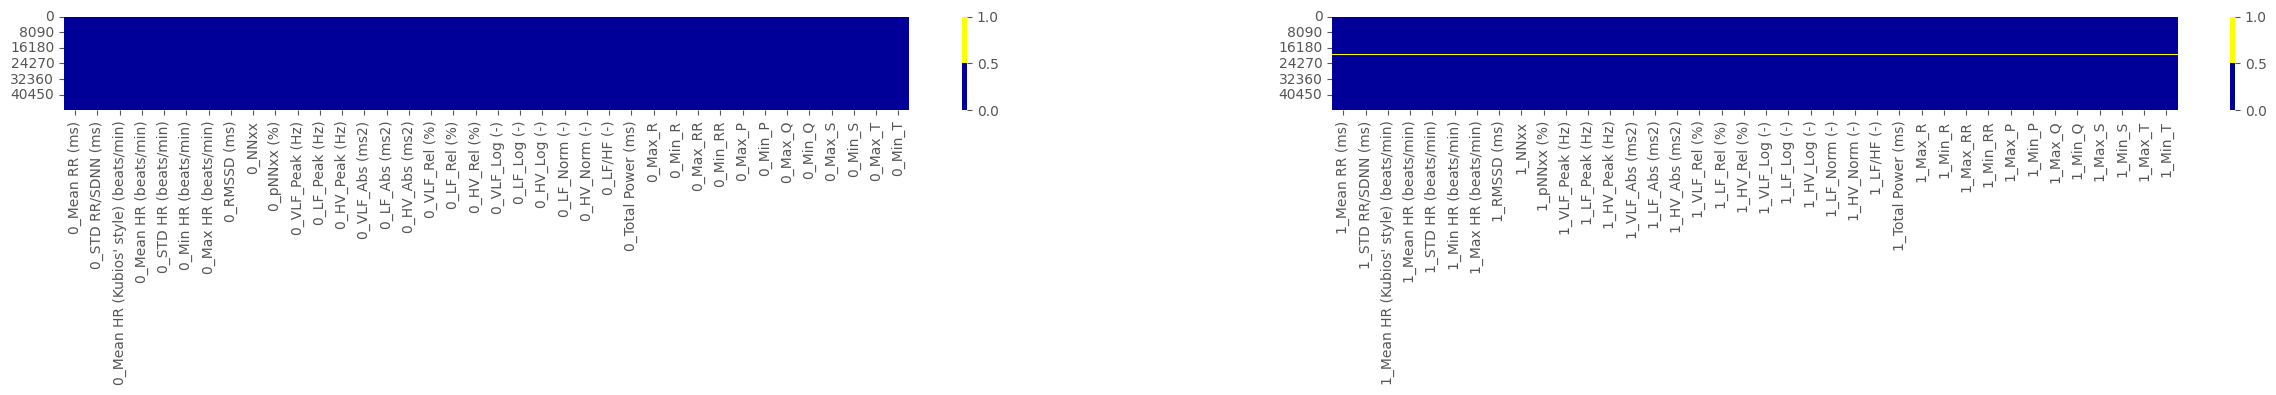

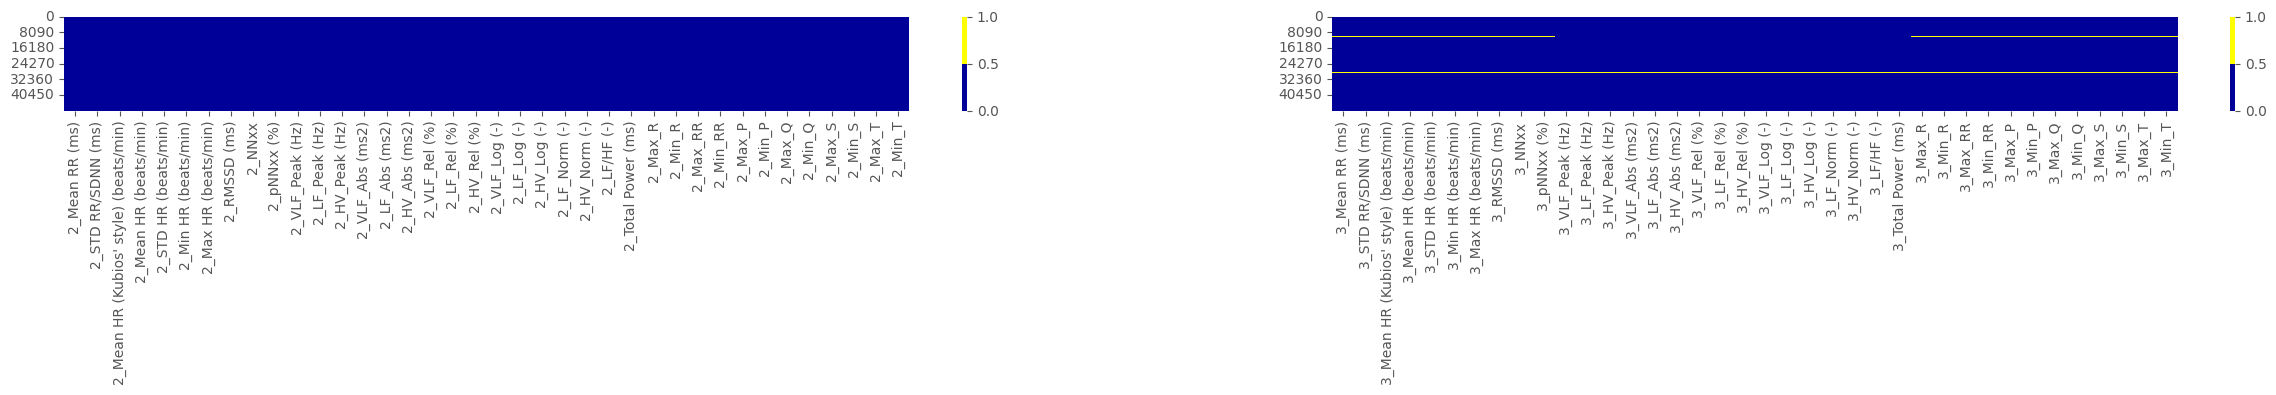

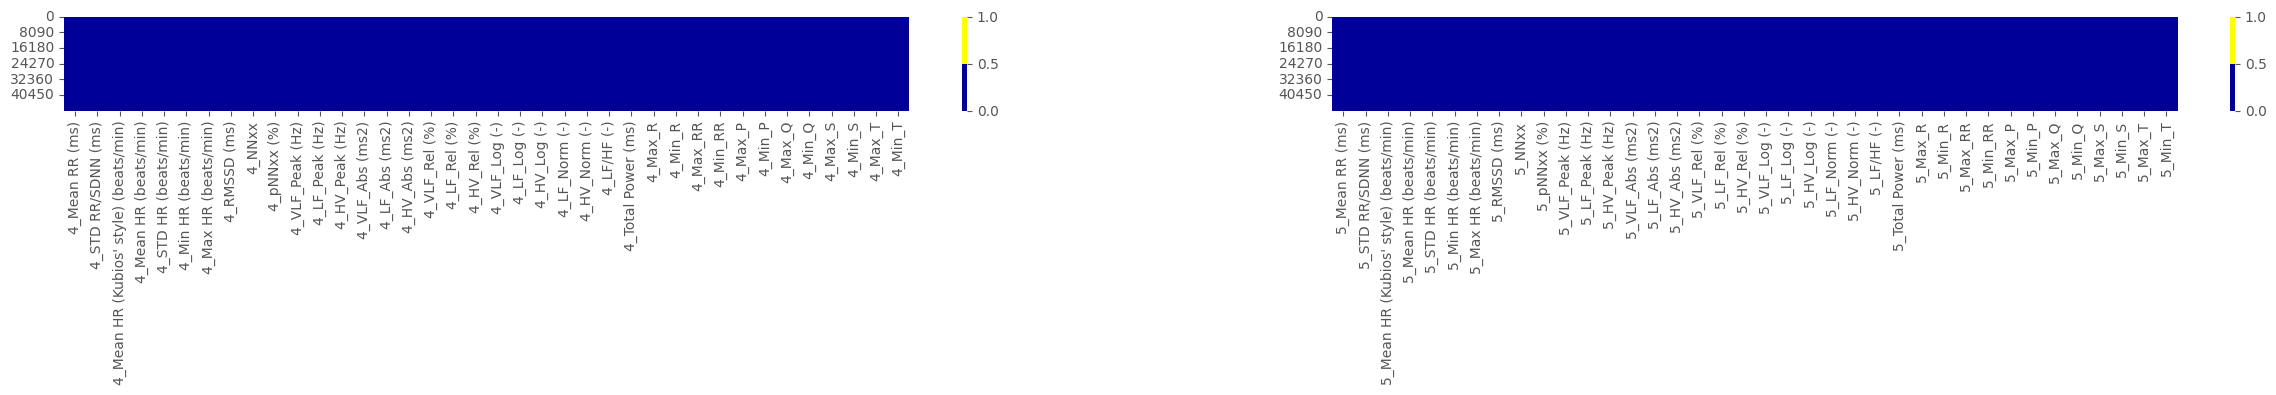

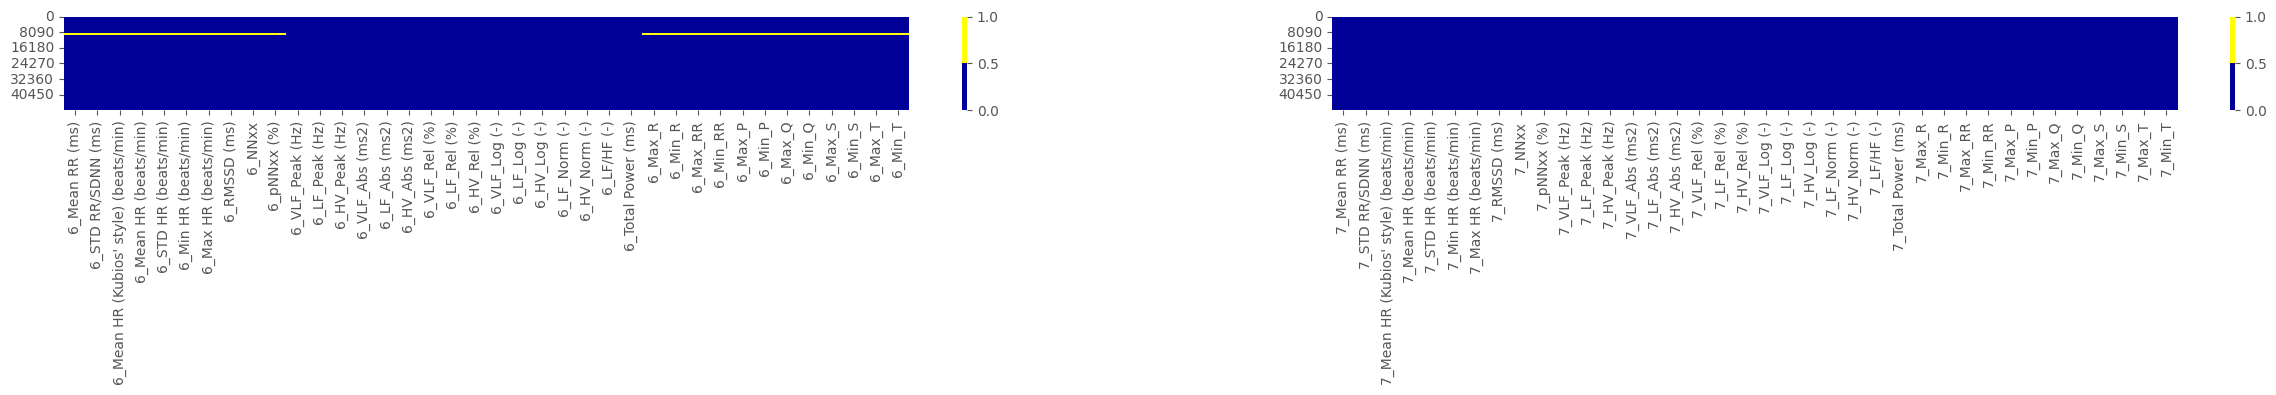

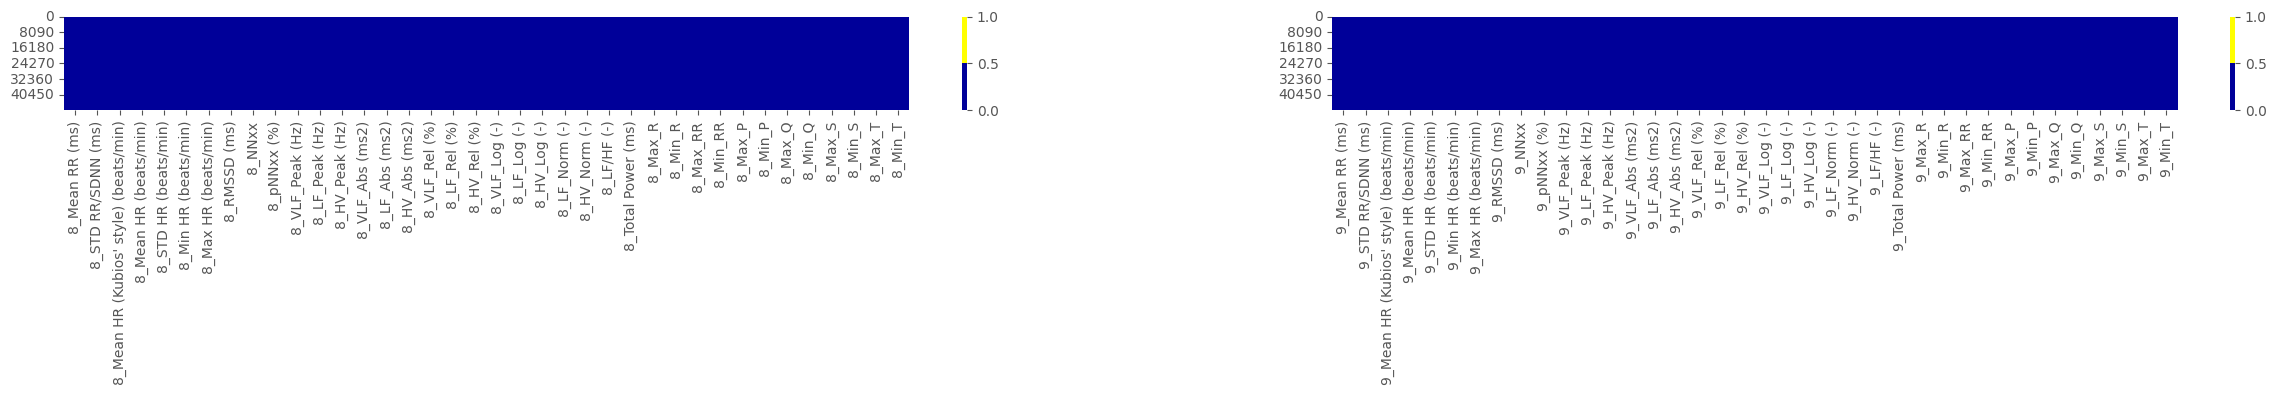

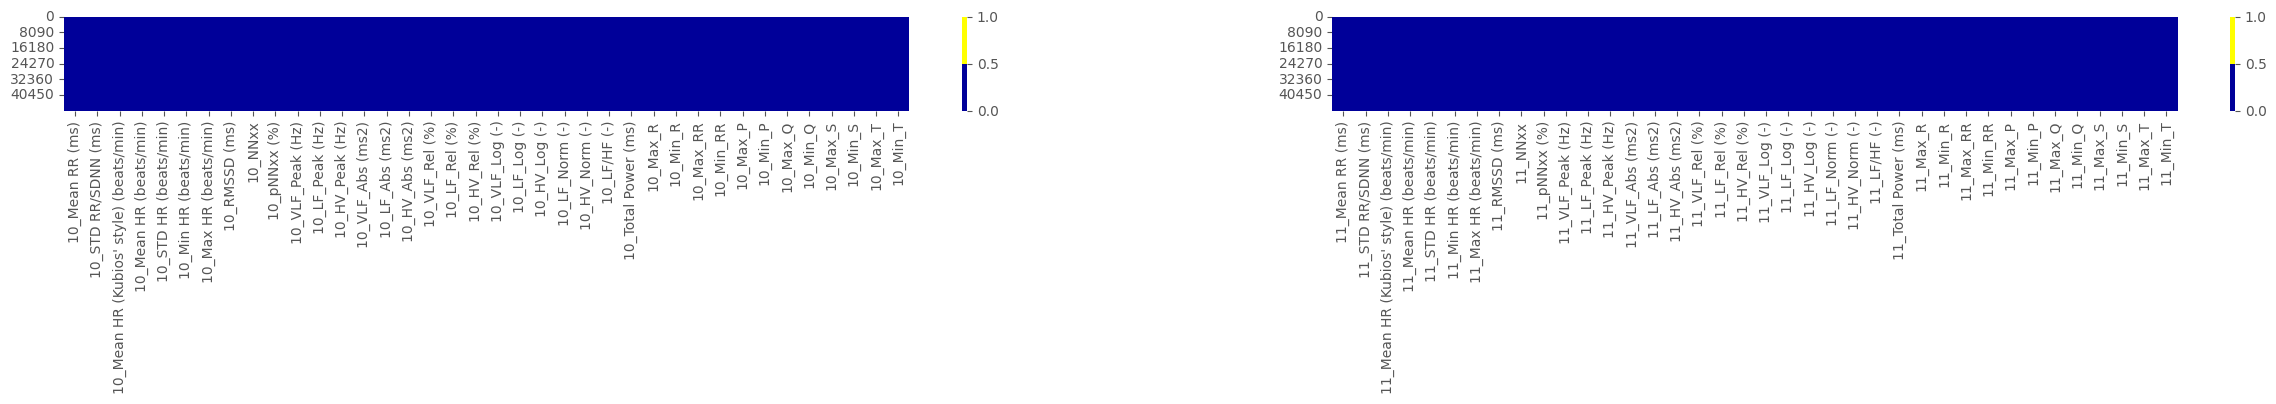

In [20]:
def f___(i):
    cols = df.columns[38*i:38*(i+1)] # первые 30 колонок
    colours = ['#000099', '#ffff00']
    if (i)%2 == 0:
      plt.figure(figsize=(30,10))
    plt.subplot((12)//2 +1, 2, i+1)
    sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

for i in range(0,12):
    f___(i)

In [21]:
for col in NEW_def.columns:
    pct_missing = np.mean(NEW_def[col].isnull())
    if round(pct_missing*100) >1:
        print('{} - {}%'.format(col, round(pct_missing*100)))

3_Mean RR (ms) - 2%
3_STD RR/SDNN (ms) - 2%
3_Mean HR (Kubios' style) (beats/min) - 2%
3_Mean HR (beats/min) - 2%
3_STD HR (beats/min) - 2%
3_Min HR (beats/min) - 2%
3_Max HR (beats/min) - 2%
3_RMSSD (ms) - 2%
3_NNxx - 2%
3_pNNxx (%) - 2%
3_Max_R - 2%
3_Min_R - 2%
3_Max_RR - 2%
3_Min_RR - 2%
3_Max_P - 2%
3_Min_P - 2%
3_Max_Q - 2%
3_Min_Q - 2%
3_Max_S - 2%
3_Min_S - 2%
3_Max_T - 2%
3_Min_T - 2%
6_Mean RR (ms) - 2%
6_STD RR/SDNN (ms) - 2%
6_Mean HR (Kubios' style) (beats/min) - 2%
6_Mean HR (beats/min) - 2%
6_STD HR (beats/min) - 2%
6_Min HR (beats/min) - 2%
6_Max HR (beats/min) - 2%
6_RMSSD (ms) - 2%
6_NNxx - 2%
6_pNNxx (%) - 2%
6_Max_R - 2%
6_Min_R - 2%
6_Max_RR - 2%
6_Min_RR - 2%
6_Max_P - 2%
6_Min_P - 2%
6_Max_Q - 2%
6_Min_Q - 2%
6_Max_S - 2%
6_Min_S - 2%
6_Max_T - 2%
6_Min_T - 2%
diagnostic - 21%
rhythm - 3%


In [22]:
def stardant(X_columns):
    #определяем смещение Центрируем данные относительно 0
    fix_displacement_min = X_columns.describe()
    for i in X_columns.describe().columns:   
        X_columns[i] = X_columns[i] - fix_displacement_min[i]["min"]
    fix_displacement = X_columns.describe()
    #Стандартизация по z-оценке
    for i in X_columns.describe().columns:   
        X_columns[i] = (X_columns[i] - fix_displacement[i]["mean"])/(fix_displacement[i]["std"])
    return X_columns ,fix_displacement_min,fix_displacement#

In [23]:
X_columns = NEW_def.copy().drop("rhythm", axis= 1).drop("diagnostic", axis= 1)

In [24]:
X_columns ,fix_displacement_min,fix_displacement =  stardant(X_columns)

In [29]:
X_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
0_Mean RR (ms),48539.0,-4.450133e-17,1.0,-4.319134,-0.711196,-0.010704,0.702657,7.349530
0_STD RR/SDNN (ms),48539.0,-6.323873e-17,1.0,-0.660915,-0.538741,-0.404601,0.023693,17.524739
0_Mean HR (Kubios' style) (beats/min),48539.0,6.932838e-16,1.0,-3.836008,-0.723341,-0.207967,0.495542,5.839092
0_Mean HR (beats/min),48539.0,-3.255623e-16,1.0,-3.787769,-0.721360,-0.208710,0.497266,5.655176
0_STD HR (beats/min),48539.0,-5.152785e-17,1.0,-0.611777,-0.517588,-0.434901,-0.113160,10.698695
...,...,...,...,...,...,...,...,...
11_Min_S,48449.0,7.921872e-15,1.0,-57.373917,-0.191804,0.260687,0.521739,3.929925
11_Max_T,48447.0,5.631895e-16,1.0,-5.050330,-0.501811,-0.194676,0.185586,54.957946
11_Min_T,48447.0,1.897685e-15,1.0,-35.137168,-0.398277,-0.041322,0.510769,28.524622
age,48539.0,-7.494960e-17,1.0,-2.654243,-0.256093,0.049126,0.310743,10.339370


In [47]:
fix_displacement_min.to_csv("fix_displacement_min.csv")
fix_displacement.to_csv("fix_displacement.csv")

In [30]:
X_columns["rhythm"] = NEW_def["rhythm"]
X_columns["diagnostic"] = NEW_def["diagnostic"]

In [31]:
NEW_def = X_columns

In [32]:
NEW_def_d = NEW_def.copy().drop("rhythm", axis= 1)
NEW_def_r = NEW_def.copy().drop("diagnostic", axis= 1)

In [33]:
NEW_def_d = NEW_def_d[(NEW_def_d.diagnostic.isnull()) != True]
NEW_def_r = NEW_def_r[(NEW_def_r.rhythm.isnull()) != True]

In [34]:
def sort_by_diagnostic(df,name):
    list_diagnostic = []
    for i in df[name].index:
        k = df[name][i].split(",")
        if len(k) > 1:
            k.sort()
            k = list(dict.fromkeys(k))
        k = ",".join(k)
        list_diagnostic.append(k)
    return  list_diagnostic

In [35]:
NEW_def_d.diagnostic = sort_by_diagnostic(NEW_def_d,"diagnostic")
NEW_def_r.rhythm = sort_by_diagnostic(NEW_def_r,"rhythm")

In [119]:
#scp_data["Unnamed: 0"]

In [36]:
NEW_def_r_1 = pd.DataFrame()
for i in scp_data[scp_data.rhythm == 1]["Unnamed: 0"]:
    NEW_def_r_1 = pd.concat([
        NEW_def_r_1,
        NEW_def_r[NEW_def_r.rhythm == i]
    ])

In [37]:
NEW_def_r_1.rhythm.value_counts()

rhythm
SR       28278
SBRAD     5692
AFIB      4708
STACH     3742
SARRH     1189
AFLT       778
SVTAC       39
Name: count, dtype: int64

In [38]:
NEW_def_d.diagnostic.value_counts()[:20]

diagnostic
NORM        9084
LVH         2583
LAFB        2525
CLBBB       2357
1AVB        2313
CRBBB       2108
LAO/LAE     2048
NST_        2000
NDT         1160
IMI         1148
RVH         1029
IRBBB        934
ISCAL        601
ISC_,LVH     532
ASMI         441
LPFB         419
ILBBB        413
ISCLA        327
ASMI,IMI     289
RAO/RAE      270
Name: count, dtype: int64

In [39]:
NEW_def_r_1 = NEW_def_r_1.dropna()
NEW_def_r_1.index = pd.RangeIndex(start=0, stop=len(NEW_def_r_1) )
NEW_def_d = NEW_def_d.dropna()
NEW_def_d.index = pd.RangeIndex(start=0, stop=len(NEW_def_d) )

In [50]:
for col in NEW_def_r_1.columns:
    pct_missing = np.mean(NEW_def_r_1[col].isnull())
    if round(pct_missing*100) >0:
        print('{} - {}%'.format(col, round(pct_missing*100)))

In [61]:
NEW_def_r_1.to_csv("ecg_df_rhythm.csv")
NEW_def_d.to_csv("ecg_df_diagnostic.csv")